# Distance Map

**build upon 10m mask**

**create file all_masks_10mdist**

Step 1. DistanceTransform

Step 2. Truncate the distance 

Step 3. Digitized the map

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [4]:
import os
import re
mask_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10m6b'
frame_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames_5m6b'

masks_files = os.listdir(mask_dir)
masks_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
frames_files = os.listdir(frame_dir)
frames_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])

# create new folder
save_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10mdist'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [5]:
def load_mask(i):
    return np.load(os.path.join(mask_dir,masks_files[i]))

In [6]:
from scipy import ndimage
def create_distance_map(mask, bins, plot=False, R=5.5):
    dst = ndimage.distance_transform_edt(mask)

    # truncate it with threshold R
    trun_dst = np.where(dst>R, R, dst)
    
    print('dst:',np.min(dst),np.max(dst))
    print('trun_dst:',np.min(trun_dst),np.max(trun_dst))
    
    #digitize it
    quan_dist = np.digitize(trun_dst, bins, right=True)
    
    if(plot):
        d = plt.figure(1)
        plt.title('binary map')
        frame0 = plt.imshow(mask,cmap='gray',)
        
        a = plt.figure(2)
        plt.title('distance map')
        frame1 = plt.imshow(dst,cmap='gray',)

        b = plt.figure(3)
        plt.title('truncated distance map')
        frame2 = plt.imshow(trun_dst,cmap='gray')
        c = plt.figure(4)
        plt.title('digitized distance map')
        frame3 = plt.imshow(quan_dist,cmap='gray')
        print('unique:',np.unique(quan_dist))

        plt.show()
    return quan_dist

('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
('unique:', array([0, 1, 2, 3, 4]))


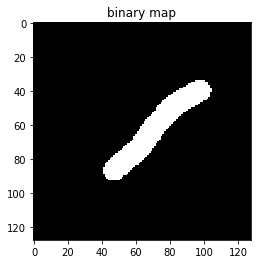

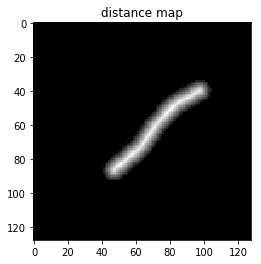

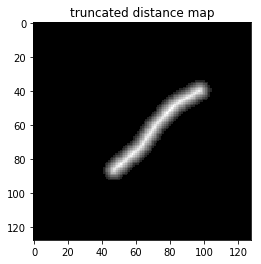

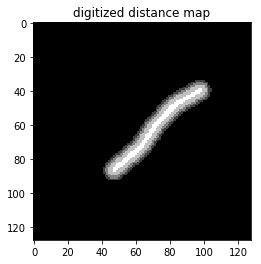

[0 1 2 3 4]


In [7]:
mask = load_mask(110)
bins = np.array([0.0, 1.5, 3.0, 5.5,10])
quan_dist_in = create_distance_map(mask, bins, plot=True, R=20)
print(np.unique(quan_dist_in))

('dst:', 0.0, 87.11486669908874)
('trun_dst:', 0.0, 24.0)
('unique:', array([0, 1, 2, 3, 4, 5]))


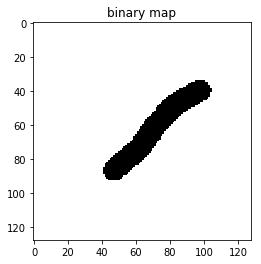

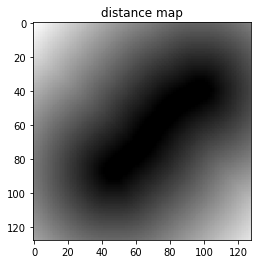

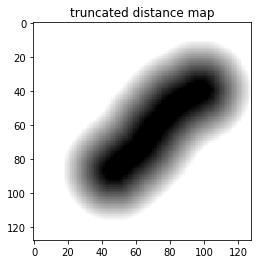

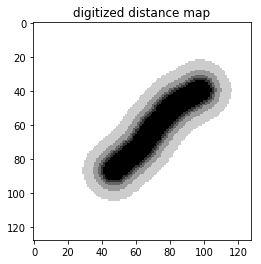

[0 1 2 3 4 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
bins = np.array([0.0, 1.5, 3, 6, 12])

quan_dist_out = 5 - create_distance_map(1-mask, bins, plot=True, R=24)
print(np.unique(quan_dist_out))
print(quan_dist_out)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 3 4 5]


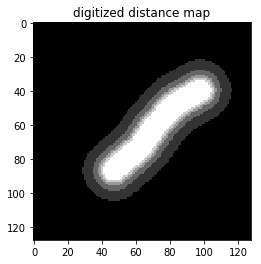

In [9]:
plt.title('digitized distance map')
frame3 = plt.imshow(quan_dist_out,cmap='gray')
print(quan_dist_out)
print(np.unique(quan_dist_out))

[0 1 2 3 4 5 6 7 8]


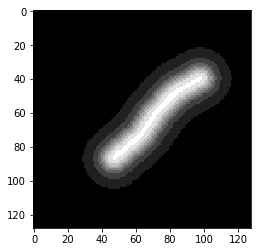

In [10]:
new_dist_mask = np.where(quan_dist_out==5, quan_dist_in+4, quan_dist_out)
frame3 = plt.imshow(new_dist_mask,cmap='gray')
print(np.unique(new_dist_mask))

In [11]:
def save_dst_mask(i):
    filename = masks_files[i]
    print(filename)
    mask = load_mask(i)
    dst = create_distance_map(mask)
    savefile = os.path.join(save_dir, filename)
#     print(savefile)
    np.save(savefile, dst)

In [20]:
def save_dst_mask_8(i):
    filename = masks_files[i]
    print(filename)
    mask = load_mask(i)
    
    bins = np.array([0.0, 1.5, 3.0, 5.5])
    quan_dist_in = create_distance_map(mask, bins, plot=False, R=10)
    print(np.unique(quan_dist_in))
    bins = np.array([0.0, 1.5, 3, 6, 12])
    quan_dist_out = 5 - create_distance_map(1-mask, bins, plot=False, R=24)
    print(np.unique(quan_dist_out))
    new_dist_mask = np.where(quan_dist_out==5, quan_dist_in+4, quan_dist_out)
    print(np.unique(new_dist_mask))
    savefile = os.path.join(save_dir, filename)
#     print(savefile)
    np.save(savefile, new_dist_mask)

In [22]:
save_dst_mask_8(110)

017_068.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 87.11486669908874)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]


# Run it

In [23]:
save_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_c9dist'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [24]:
for i in range(len(masks_files)):
    save_dst_mask_8(i)

001_044.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
001_047.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
002_037.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
002_051.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
003_037.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
003_041.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
003_045.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 152.04275714416653)
('trun_dst:', 0.0, 

012_055.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 121.75385004179539)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
012_058.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
012_060.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
012_071.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
012_076.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
013_049.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 108.90362712049586)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
013_050.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst

017_074.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 136.49908424601244)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
018_030.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
018_047.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
018_060.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 109.7679370308106)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
018_061.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 78.26237921249263)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
018_066.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
018_067.npy
('dst:', 0.0, 7.810249675906

024_020.npy
('dst:', 0.0, 11.40175425099138)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 123.76186811776881)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
024_021.npy
('dst:', 0.0, 11.40175425099138)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 84.72307831990054)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
024_022.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 129.0348790056394)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
024_034.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 140.34600101178515)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
024_035.npy
('dst:', 0.0, 10.295630140987)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 94.30270409696638)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
024_036.npy
('dst:', 0.0, 10.295630140987)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 86.9770084

027_083.npy
('dst:', 0.0, 10.63014581273465)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 83.00602387778854)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
027_084.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 131.0267148332736)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
027_086.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
027_087.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
028_024.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 85.9127464349732)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
028_025.npy
('dst:', 0.0, 8.48528137423857)
('trun_dst:', 0.0, 8.48528137423857)
[0 1 2 3 4]
('dst:', 0.0, 68.4470598345904)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 

030_074.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
030_083.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
031_023.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 121.85236969382254)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
031_027.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
031_040.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 101.23734488813898)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
031_041.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 75.66372975210778)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
031_042.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4

037_057.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
037_060.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
037_062.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
037_063.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
037_072.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 135.20724832641184)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
037_073.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 140.80127840328723)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
037_074.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[

042_045.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
042_054.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
042_065.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
042_072.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
042_084.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
042_086.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
043_030.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
043_03

048_028.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 125.36347155371855)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
048_029.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 124.03628501370073)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
048_030.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 81.8413098624405)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
048_031.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 75.28612089887484)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
048_032.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 76.11832893594026)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
048_033.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 104.80458005259122)
('trun_dst:', 0.0

051_056.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
051_059.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
051_061.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
051_066.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 133.30416347586447)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
051_067.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 93.60021367496978)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
051_085.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
052_014.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0

057_071.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 127.31064370271639)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
057_080.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
057_082.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
057_087.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
057_088.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
057_089.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
058_028.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]


061_043.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
061_045.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
061_052.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
061_054.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
061_056.npy
('dst:', 0.0, 10.04987562112089)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 131.10301293257908)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
061_057.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 73.49829930005184)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
061_058.npy
('dst:', 0.0, 8.246211251235321)
('trun_dst:', 0.0, 8.24

066_039.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
066_043.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
066_063.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
066_071.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
066_082.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
066_096.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
067_032.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
067_03

070_096.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
070_099.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
071_017.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
071_021.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
071_059.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 122.29881438509533)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
071_060.npy
('dst:', 0.0, 8.94427190999916)
('trun_dst:', 0.0, 8.94427190999916)
[0 1 2 3 4]
('dst:', 0.0, 73.81734213584231)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
071_061.npy
('dst:', 0.0, 8.94427190999916)
('trun_dst:',

075_017.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
075_038.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
075_042.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
075_045.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
075_050.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
075_069.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
075_074.npy
('dst:', 0.0, 8.246211251235321)
('trun_dst:', 0.0, 8.246211251235321)
[0 1 2 3 4]
('dst:', 0.0, 123.3288287465668)
('trun_dst:', 0.0, 2

('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
077_091.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
077_092.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 116.27553482998907)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
077_093.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 94.76286192385707)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
077_094.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 94.04786015641186)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
077_095.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 103.9471019317037)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
077_097.npy
('dst:', 0.0, 0.0)


080_108.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
081_024.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
081_029.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
081_041.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
081_045.npy
('dst:', 0.0, 10.04987562112089)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 131.82184947875675)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
081_046.npy
('dst:', 0.0, 10.04987562112089)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 113.718951806636)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
081_047.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[

085_072.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
085_086.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 142.1442928857856)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
085_087.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 132.0075755401939)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
085_094.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
085_098.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
085_106.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
085_110.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]

089_071.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
089_084.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
089_088.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
089_108.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
089_116.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
090_013.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
090_023.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
090_03

093_023.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
093_028.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 102.08329931972223)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
093_029.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 96.79876032264049)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
093_049.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
093_065.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
093_085.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
093_091.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0

096_036.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
096_038.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 146.38647478507022)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
096_039.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 131.82184947875675)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
096_045.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
096_047.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
096_079.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
096_081.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 

100_102.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
100_107.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
100_115.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
101_016.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
101_039.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
101_043.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
101_052.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
101_06

105_020.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
105_035.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
105_048.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
105_066.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
105_081.npy
('dst:', 0.0, 10.198039027185569)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 130.26895255585654)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
105_082.npy
('dst:', 0.0, 10.198039027185569)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 146.18481453283715)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
105_083.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.313

108_058.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
108_059.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
108_060.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
108_062.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
108_064.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
108_078.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
108_092.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 128.70120434556935)
('trun_dst:', 0.0, 

111_049.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
111_060.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 114.58621208504974)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
111_061.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 79.61155694998057)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
111_062.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 118.1905241548577)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
111_095.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 91.21951545584969)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
111_096.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 97.18538984847466)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
111_

113_116.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
113_117.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
113_119.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
114_025.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
114_035.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
114_043.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
114_048.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
114_05

116_090.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
116_096.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 134.30189872075525)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
116_097.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 113.95174417269794)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
116_098.npy
('dst:', 0.0, 11.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 93.40770846134703)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
116_099.npy
('dst:', 0.0, 11.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 54.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
116_100.npy
('dst:', 0.0, 13.416407864998739)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 80.8084154033477)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
116_101.npy
('dst:', 0.0, 12.727922061357855)
('trun_ds

120_073.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
120_082.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 127.05904139414872)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
120_083.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 142.90206436577463)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
120_085.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
120_090.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
120_100.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
120_103.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1

123_068.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 110.63453348751464)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
123_069.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 138.6001443000692)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
123_072.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
123_074.npy
('dst:', 0.0, 2.8284271247461903)
('trun_dst:', 0.0, 2.8284271247461903)
[0 1 2]
('dst:', 0.0, 177.48521065147935)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
123_075.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 128.41339493993607)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
123_076.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 156.28499608087785)
('trun

126_091.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 131.10301293257908)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
126_108.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
126_110.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 90.52071586106685)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
126_111.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 125.09996003196804)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
126_113.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
126_117.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
126_124.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376

129_070.npy
('dst:', 0.0, 9.848857801796104)
('trun_dst:', 0.0, 9.848857801796104)
[0 1 2 3 4]
('dst:', 0.0, 159.11316727411344)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
129_077.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
129_079.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
129_083.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
129_086.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
129_088.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
129_090.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:'

132_041.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_043.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_048.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_053.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_054.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_056.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_063.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
132_06

134_117.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
134_118.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
134_121.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
134_131.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
135_045.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
135_048.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
135_058.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
135_07

('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 138.2931668593933)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
138_097.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 140.85808461000738)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
138_104.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 134.18271125595876)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
138_105.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 88.81441324469807)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
138_106.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 119.36498649101419)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
138_117.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4

140_137.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 126.30122723077555)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
140_138.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 142.80056022299073)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
141_040.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
141_070.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
141_072.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 138.2931668593933)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
141_073.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 84.21995013059554)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
141_074.npy
('dst:', 0

143_140.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
144_059.npy
('dst:', 0.0, 10.816653826391969)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 138.69751259485514)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
144_060.npy
('dst:', 0.0, 10.816653826391969)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 101.67103815738285)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
144_061.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 103.46980235798269)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
144_062.npy
('dst:', 0.0, 16.64331697709324)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 93.91485505499116)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
144_063.npy
('dst:', 0.0, 16.64331697709324)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 80.05623023850174)
('trun_dst:', 0.0, 24.0)
[0 1

145_114.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 117.32433677630571)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
145_115.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 75.92759709091287)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
145_116.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 129.3213052826177)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
145_121.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
145_126.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
145_131.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 131.24404748406687)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8

147_106.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
147_108.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
147_119.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 123.10970717209915)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
147_120.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 86.97700845625813)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
147_121.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 114.58621208504974)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
147_132.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 124.57929201917949)
('trun_dst:', 0.

149_127.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
149_146.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
150_045.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
150_047.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
150_053.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
150_056.npy
('dst:', 0.0, 11.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 108.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
150_057.npy
('dst:', 0.0, 11.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 76.24303246854758)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]


152_061.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 100.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
152_062.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 118.51160280748886)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
152_066.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
152_093.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
152_094.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
152_095.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
152_108.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 95.21029356114

155_082.npy
('dst:', 0.0, 9.055385138137417)
('trun_dst:', 0.0, 9.055385138137417)
[0 1 2 3 4]
('dst:', 0.0, 110.11357772772621)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
155_083.npy
('dst:', 0.0, 9.055385138137417)
('trun_dst:', 0.0, 9.055385138137417)
[0 1 2 3 4]
('dst:', 0.0, 116.27553482998907)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
155_107.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
155_109.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
155_125.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
155_129.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
155_130.npy
('dst:', 0.0, 10.770329614269007)
('trun_dst

159_103.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
159_112.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 112.80514172678478)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
159_113.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 89.1852005660132)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
159_115.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
159_116.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
159_124.npy
('dst:', 0.0, 12.36931687685298)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 112.53888216967503)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
159_125.npy
('dst:', 0.0,

161_096.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
161_108.npy
('dst:', 0.0, 11.313708498984761)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 120.41594578792295)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
161_109.npy
('dst:', 0.0, 11.313708498984761)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 125.86500705120545)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
161_118.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 91.92388155425118)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
161_119.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 106.23088063270491)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
161_124.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 152.22680447279973)
('trun_dst:', 0.0, 24.0)
[

163_135.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 123.84667940643382)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
163_136.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 113.27841806805037)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
163_143.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
163_147.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
163_149.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 128.5496013218244)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
163_150.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 142.84257068535277)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
163_160.npy
('dst:', 

165_069.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
165_070.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 144.3606594609487)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
165_071.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 133.60014970051492)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
165_072.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
165_076.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
165_097.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
165_102.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 131.82

166_152.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
166_169.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
166_170.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
166_171.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
167_052.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
167_075.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
167_088.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
167_09

169_092.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 139.2838827718412)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
169_093.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 113.22985472038724)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
169_096.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
169_099.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
169_105.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 148.55302083767936)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
169_106.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 79.63039620647382)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7

171_049.npy
('dst:', 0.0, 12.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 132.9699214108213)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
171_050.npy
('dst:', 0.0, 12.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 123.3288287465668)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
171_051.npy
('dst:', 0.0, 11.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 155.32224567009067)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
171_058.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
171_100.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 95.2732911156112)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
171_101.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 90.52071586106685)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
171_1

173_049.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 101.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
173_050.npy
('dst:', 0.0, 13.601470508735444)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 49.57822102496216)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
173_051.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 81.12336284942828)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
173_052.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 126.19429464123962)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
173_072.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
173_093.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 134.31678971744373)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]

174_143.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
174_153.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
174_154.npy
('dst:', 0.0, 9.219544457292887)
('trun_dst:', 0.0, 9.219544457292887)
[0 1 2 3 4]
('dst:', 0.0, 147.78700890132393)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
174_155.npy
('dst:', 0.0, 9.055385138137417)
('trun_dst:', 0.0, 9.055385138137417)
[0 1 2 3 4]
('dst:', 0.0, 111.7899816620434)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
174_156.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 148.51935900750448)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
174_163.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
174_166.npy
(

176_083.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
176_091.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 107.56393447619885)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
176_092.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 135.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
176_097.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
176_101.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
176_128.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
176_129.npy
('dst:', 0.0, 8.48528137423857)
('trun_dst:', 0.0, 8.48528137423857)
[0 1 2 3 4]
('dst:', 0.0, 134.7145129523913)

177_182.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
178_048.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 104.01922899156675)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
178_049.npy
('dst:', 0.0, 10.198039027185569)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 144.84474446799925)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
178_050.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
178_051.npy
('dst:', 0.0, 12.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 96.25487000666512)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
178_052.npy
('dst:', 0.0, 12.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 106.4377752492037)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
178_060.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 

179_098.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 130.86252328302402)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
179_099.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 133.6600164596728)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
179_110.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 121.91800523302537)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
179_111.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 118.92854997854805)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
179_117.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
179_121.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
179_126.npy
('dst:', 

181_175.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 94.15412895885129)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
181_183.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
181_189.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
182_049.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
182_055.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
182_073.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
182_074.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[

184_111.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 130.66751700403586)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
184_112.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 107.44766167767449)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
184_120.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
184_122.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 138.4088147481944)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
184_123.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 142.3411395205195)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
184_125.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 99.80981915623332)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]

186_090.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 70.8590149522275)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
186_091.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 89.58794561770016)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
186_093.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 104.65180361560904)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
186_094.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 131.24404748406687)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
186_110.npy
('dst:', 0.0, 9.848857801796104)
('trun_dst:', 0.0, 9.848857801796104)
[0 1 2 3 4]
('dst:', 0.0, 139.84634424968)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
186_111.npy
('dst:', 0.0, 9.848857801796104)
('trun_dst:', 0.0, 9.848857801796104)
[0 1 

188_160.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
188_171.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
188_178.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
188_181.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 107.29864864013899)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
188_182.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 98.38699100999075)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
188_183.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 138.2931668593933)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
188_187.npy
('dst:', 0.0, 7.071067811865

190_195.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
191_057.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
191_061.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
191_076.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
191_080.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 101.07423014794622)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
191_081.npy
('dst:', 0.0, 13.416407864998739)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 92.13576938409967)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
191_082.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 130.0)
('trun_ds

193_090.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 101.82337649086284)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
193_091.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 142.41137595009747)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
193_093.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
193_101.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 100.68763578513501)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
193_102.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 74.94664769020693)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
193_103.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 127.7810627597063)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
193_

195_132.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
195_133.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
195_155.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
195_159.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
195_169.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
195_205.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 145.90750494748377)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
195_206.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 146.64924138910504)
('trun_dst:', 0.0, 24.0)
[0 1

197_212.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 119.50313803411188)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
197_219.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
197_222.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
198_069.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
198_082.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
198_093.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
198_097.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]


200_094.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 129.24782396620841)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
200_105.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
200_111.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 110.42191811411355)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
200_112.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 146.03081866510234)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
200_113.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
200_134.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
200_145.np

202_115.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 115.00434774390054)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
202_116.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 96.26006440887103)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
202_120.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 115.96551211459379)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
202_121.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 83.00602387778854)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
202_122.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 117.37972567696688)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
202_132.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[

203_220.npy
('dst:', 0.0, 13.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 77.6659513557904)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
203_221.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 137.88400922514546)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
204_077.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
204_083.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
204_088.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
204_092.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 89.49860334105779)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
204_093.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.

205_203.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
205_204.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
205_209.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
205_216.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
205_225.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
205_230.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
206_083.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
206_08

207_197.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
207_224.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
208_100.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
208_108.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
208_119.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
208_129.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 89.80534505250787)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
208_130.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 134.71822445385777)


210_218.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
210_220.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
210_225.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
210_228.npy
('dst:', 0.0, 11.40175425099138)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 152.8953890737062)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
210_229.npy
('dst:', 0.0, 11.40175425099138)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 122.71104269787622)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
210_230.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 154.5639026422405)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
210_233.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.

('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 141.9929575718458)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
212_237.npy
('dst:', 0.0, 10.816653826391969)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 125.49501982150527)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
212_238.npy
('dst:', 0.0, 10.816653826391969)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 117.41379816699569)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
212_247.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
213_108.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
213_118.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
213_126.npy
('dst:', 0.0, 0.0)
('trun_dst:', 

214_225.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
214_226.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
214_229.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 99.46356116689167)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
214_230.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 70.45565981523414)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
214_231.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 104.7377677822093)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
214_235.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 86.55634003352961)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4

('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_209.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_219.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_228.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_241.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_247.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_262.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
217_264.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:

220_199.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
220_204.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
220_213.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
220_219.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
220_236.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 121.75795661885921)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
220_237.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 106.30145812734649)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
220_240.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.

222_172.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 104.20172743289815)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
222_174.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
222_176.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 132.9135057095403)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
222_177.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 123.30855606972291)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
222_178.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 109.38464243210744)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
222_179.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 67.68308503607086)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5

223_176.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 79.98124780221924)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
223_177.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 97.83659846908007)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
223_178.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 84.69356528095862)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
223_179.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 68.87670143089025)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
223_180.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 129.0310040261642)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
223_182.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755

224_198.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 84.50443775329198)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
224_199.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 113.13708498984761)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
224_214.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 113.45483682946268)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
224_215.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 119.20570456148481)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
224_218.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
224_224.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 

225_226.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 144.04513181638595)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
225_238.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
225_242.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
225_251.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 146.98639392814562)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
225_252.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 120.55289295574785)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
225_253.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 156.28499608087785)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
225_256.npy
('dst:', 0.0, 7.07106781186547

226_243.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
226_247.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
226_250.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 122.80065146407001)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
226_251.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 89.35882720806042)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
226_252.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 65.79513659838392)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
226_253.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 118.53269591129698)
('trun_dst:', 0.0, 24.0)


227_197.npy
('dst:', 0.0, 7.615773105863909)
('trun_dst:', 0.0, 7.615773105863909)
[0 1 2 3 4]
('dst:', 0.0, 92.00543462209176)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
227_198.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 138.95682782792647)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
227_202.npy
('dst:', 0.0, 9.055385138137417)
('trun_dst:', 0.0, 9.055385138137417)
[0 1 2 3 4]
('dst:', 0.0, 109.80892495603443)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
227_203.npy
('dst:', 0.0, 9.055385138137417)
('trun_dst:', 0.0, 9.055385138137417)
[0 1 2 3 4]
('dst:', 0.0, 86.40023148117139)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
227_204.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 82.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
227_205.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 106.21205204683694)
('t

228_152.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 90.80198235721508)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_153.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 121.93850909372314)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_157.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 115.43396380615195)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_158.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 157.3848785620779)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_165.npy
('dst:', 0.0, 12.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 136.69308687713507)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_166.npy
('dst:', 0.0, 9.219544457292887)
('trun_dst:', 0.0, 9.219544457292887)
[0 1 2 3 4]
('dst:', 0.0, 116.811

228_273.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 159.62455951387932)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_278.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 107.16809226630845)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_279.npy
('dst:', 0.0, 9.219544457292887)
('trun_dst:', 0.0, 9.219544457292887)
[0 1 2 3 4]
('dst:', 0.0, 141.60508465447137)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_280.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 128.40560735419618)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_281.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 85.88364221433555)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
228_282.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 125.3993620398

229_255.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 82.85529554590944)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
229_256.npy
('dst:', 0.0, 9.433981132056603)
('trun_dst:', 0.0, 9.433981132056603)
[0 1 2 3 4]
('dst:', 0.0, 127.91012469699183)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
229_257.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
229_274.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
229_277.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 136.97079980784227)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
229_278.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 73.16419889536138)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
229_279.npy
('dst:',

230_209.npy
('dst:', 0.0, 10.63014581273465)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 105.4229576515476)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
230_210.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 97.52948272189288)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
230_211.npy
('dst:', 0.0, 9.486832980505138)
('trun_dst:', 0.0, 9.486832980505138)
[0 1 2 3 4]
('dst:', 0.0, 75.05997601918082)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
230_212.npy
('dst:', 0.0, 9.486832980505138)
('trun_dst:', 0.0, 9.486832980505138)
[0 1 2 3 4]
('dst:', 0.0, 112.80514172678478)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
230_218.npy
('dst:', 0.0, 9.0)
('trun_dst:', 0.0, 9.0)
[0 1 2 3 4]
('dst:', 0.0, 88.88756943465155)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
230_219.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 59.135437767890075)
('

231_207.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 127.81236246936366)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
231_208.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 67.54257916307313)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
231_209.npy
('dst:', 0.0, 10.63014581273465)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 77.15568676384133)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
231_210.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 127.94139283281233)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
231_211.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 94.62557793746889)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
231_212.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 118.1185844818672)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
231_214.npy
('dst:', 0.0,

232_287.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 82.0792300158816)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
232_288.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 115.43396380615195)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
232_289.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 138.68309197591464)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
232_290.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 97.06183596038146)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
232_291.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 124.73972903610141)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
232_292.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.313615

234_262.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
234_265.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
234_269.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
234_277.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
234_285.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
234_289.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 134.35028842544403)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
234_290.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 128.03515142334936)
('trun_dst:', 0.0, 24.0)
[0 1

236_223.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 113.81124724736128)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
236_224.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 91.00549433962765)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
236_225.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 120.50726119201282)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
236_226.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 111.12605455067681)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
236_227.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 124.01612798341996)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
236_229.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 

237_244.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 74.54528824815154)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
237_245.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 126.19429464123962)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
237_264.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 96.33275663033837)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
237_265.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 138.45215780189199)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
237_277.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
237_279.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:

239_229.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 142.8355697996826)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
239_230.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 126.09916732476864)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
239_239.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 97.30878685915265)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
239_240.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 88.52683209061533)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
239_241.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 104.01922899156675)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
239_242.npy
('dst:', 0.0, 7.280109889280518)
('trun_d

240_300.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 114.33722053644648)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
240_301.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 89.0)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
240_303.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
241_215.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
241_218.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 123.17467272130257)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
241_222.npy
('dst:', 0.0, 8.48528137423857)
('trun_dst:', 0.0, 8.48528137423857)
[0 1 2 3 4]
('dst:', 0.0, 110.06361796706484)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
241_

243_247.npy
('dst:', 0.0, 10.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 137.05838172107534)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
243_248.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 91.2414379544733)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
243_254.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
243_261.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
243_262.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
243_279.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
243_297.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361

245_260.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 112.80514172678478)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
245_261.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 119.01680553602503)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
245_263.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 88.63972021616495)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
245_264.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 108.07867504739313)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
245_266.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 90.44335243676011)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
245_267.npy
('dst:', 0.0, 7.0710678118654755)
('trun

247_242.npy
('dst:', 0.0, 12.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 67.17886572427373)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
247_243.npy
('dst:', 0.0, 8.06225774829855)
('trun_dst:', 0.0, 8.06225774829855)
[0 1 2 3 4]
('dst:', 0.0, 76.36753236814714)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
247_247.npy
('dst:', 0.0, 9.055385138137417)
('trun_dst:', 0.0, 9.055385138137417)
[0 1 2 3 4]
('dst:', 0.0, 150.8011936292283)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
247_248.npy
('dst:', 0.0, 7.280109889280518)
('trun_dst:', 0.0, 7.280109889280518)
[0 1 2 3 4]
('dst:', 0.0, 105.94810050208545)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
247_249.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.0, 119.5198728245642)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
247_254.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 80.7093550959243)
('trun_dst:', 0.0, 24

249_247.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 142.8355697996826)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
249_248.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 129.9576854210631)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
249_251.npy
('dst:', 0.0, 13.0)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 116.55899793666725)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
249_252.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 80.52949770115296)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
249_254.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 125.2078272313676)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
249_255.npy
('dst:', 0.0, 7.0)
('trun_dst:', 0.0, 7.0)
[0 1 2 3 4]
('dst:', 0.0, 149.96666296213968)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
249_268.npy


253_250.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
253_256.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
253_268.npy
('dst:', 0.0, 0.0)
('trun_dst:', 0.0, 0.0)
[0]
('dst:', 1.0, 180.31361568112376)
('trun_dst:', 1.0, 24.0)
[0 1 2 3 4]
[0 1 2 3 4]
253_271.npy
('dst:', 0.0, 13.45362404707371)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 151.64761785138597)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
253_272.npy
('dst:', 0.0, 8.602325267042627)
('trun_dst:', 0.0, 8.602325267042627)
[0 1 2 3 4]
('dst:', 0.0, 107.33592129385204)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
253_273.npy
('dst:', 0.0, 8.602325267042627)
('trun_dst:', 0.0, 8.602325267042627)
[0 1 2 3 4]
('dst:', 0.0, 134.46932735757994)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
253_275.npy
('dst:', 0.

256_280.npy
('dst:', 0.0, 7.810249675906654)
('trun_dst:', 0.0, 7.810249675906654)
[0 1 2 3 4]
('dst:', 0.0, 64.5600495662759)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
256_281.npy
('dst:', 0.0, 7.211102550927978)
('trun_dst:', 0.0, 7.211102550927978)
[0 1 2 3 4]
('dst:', 0.0, 109.20164833920778)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
256_282.npy
('dst:', 0.0, 10.770329614269007)
('trun_dst:', 0.0, 10.0)
[0 1 2 3 4]
('dst:', 0.0, 112.44554237496477)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
256_283.npy
('dst:', 0.0, 8.54400374531753)
('trun_dst:', 0.0, 8.54400374531753)
[0 1 2 3 4]
('dst:', 0.0, 112.0446339634344)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
256_284.npy
('dst:', 0.0, 9.219544457292887)
('trun_dst:', 0.0, 9.219544457292887)
[0 1 2 3 4]
('dst:', 0.0, 99.84988733093293)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]
256_285.npy
('dst:', 0.0, 8.0)
('trun_dst:', 0.0, 8.0)
[0 1 2 3 4]
('dst:', 0.

# Codes

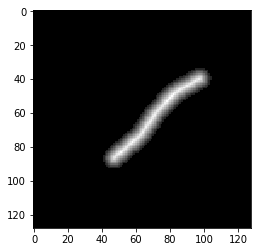

In [151]:
#distanceTransformation
from scipy import ndimage
dst = ndimage.distance_transform_edt(mask)
plt.imshow(dst,cmap='gray')

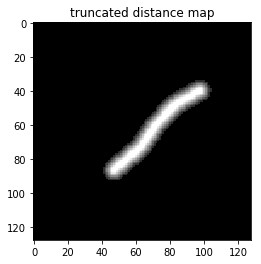

In [153]:
#Truncate it use Threshold R
R = 5.5
trun_dst = np.where(dst>R, R, dst)
plt.title('truncated distance map')
plt.imshow(trun_dst,cmap='gray')

In [146]:
print(np.min(dst),np.max(dst))
print(np.min(trun_dst),np.max(trun_dst))

0.0 7.0710678118654755
0.0 5.5


[0 1 2 3 4]


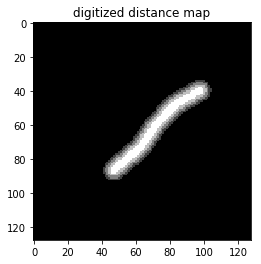

In [155]:
bins = np.array([0.0, 1.5, 3.0, 4.5,7])
quan_dist = np.digitize(trun_dst, bins, right=True)
plt.title('digitized distance map')
plt.imshow(quan_dist,cmap='gray')
print(np.unique(quan_dist))

In [10]:
a = np.array([[1,2],[3,4]])
mask = np.eye(5)[a]

In [12]:
print(mask.shape)

(2, 2, 5)
